In /home/manuel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manuel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manuel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/manuel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/manuel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

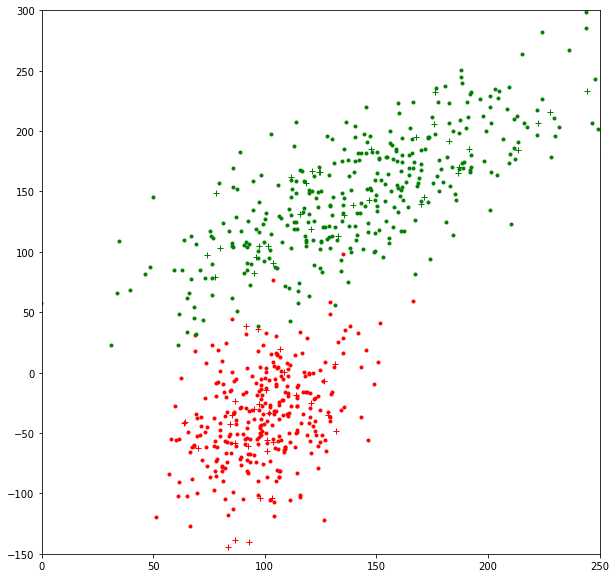

In [1]:
import numpy as np
from matplotlib import pyplot as plt


l1= 300
l2= 350


x1=np.random.normal(100, 20, l1)
y1=np.random.normal(150, 50, l1)
theta1=-np.pi/4.
x1t=x1
y1t=x1*np.cos(theta1)+y1*np.sin(theta1)

x2=np.random.normal(50, 40,l2)
y2=np.random.normal(150, 50,l2)
theta2=np.pi/4.
x2t=x2*np.sin(theta2)+y2*np.cos(theta2)
y2t=y2



Testl1= 30
Testl2= 35

Tx1=np.random.normal(100, 20, Testl1)
Ty1=np.random.normal(150, 50, Testl1)
theta1=-np.pi/4.
Tx1t=Tx1
Ty1t=Tx1*np.cos(theta1)+Ty1*np.sin(theta1)

Tx2=np.random.normal(50, 40, Testl2)
Ty2=np.random.normal(150, 50, Testl2)
theta2=np.pi/4.
Tx2t=Tx2*np.sin(theta2)+Ty2*np.cos(theta2)
Ty2t=Ty2


plt.figure(figsize=(10,10))
plt.plot(x1t,y1t,'.r')
plt.plot(x2t,y2t,'.g')
plt.plot(Tx1t,Ty1t,'+r')
plt.plot(Tx2t,Ty2t,'+g')
plt.xlim(0,250)
plt.ylim(-150,300)
plt.show()



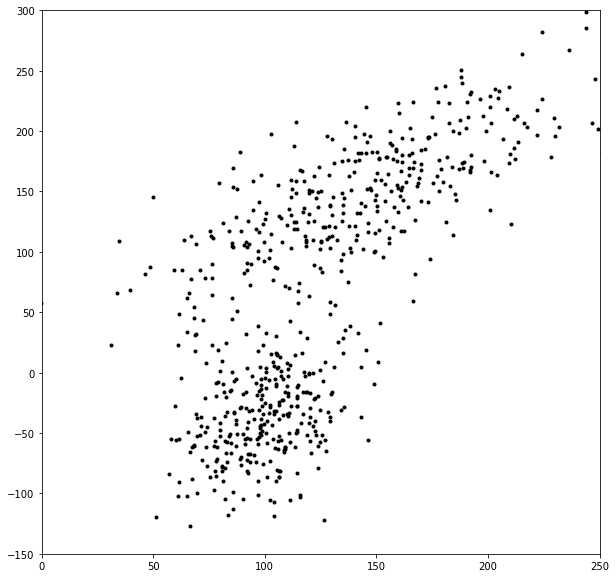

In [2]:
xt=np.concatenate([x1t,x2t])
yt=np.concatenate([y1t,y2t])

plt.figure(figsize=(10,10))
plt.plot(xt,yt,'.k')
plt.xlim(0,250)
plt.ylim(-150,300)
plt.show()

In [3]:
from sklearn.mixture import GaussianMixture as gmm

data=np.zeros((l1+l2,2))
data[0:l1,0]=x1t
data[0:l1,1]=y1t
data[l1:l1+l2,0]=x2t
data[l1:l1+l2,1]=y2t

data_label=np.zeros((l1+l2))
data_label[0:l1]=0
data_label[l1:l1+l2]=1

test=np.zeros((Testl1+Testl2,2))
test[0:Testl1,0]=Tx1t
test[0:Testl1,1]=Ty1t
test[Testl1:Testl1+Testl2,0]=Tx2t
test[Testl1:Testl1+Testl2,1]=Ty2t

test_label=np.zeros((20))
test_label[0:Testl1]=0
test_label[Testl1:Testl1+Testl2]=1

In [4]:
len(data)
len(test)

65

In [5]:
# fit a Gaussian Mixture Model with two components
clf = gmm(n_components=2, covariance_type='full')
clf.fit(data)

GaussianMixture(n_components=2)

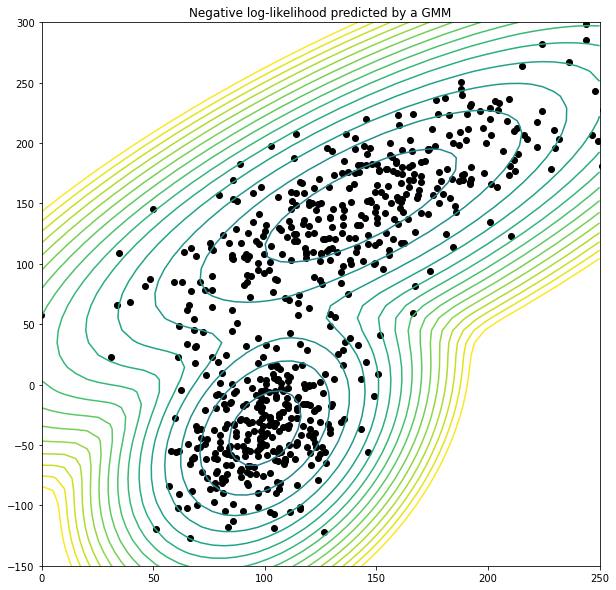

In [6]:
from matplotlib.colors import LogNorm

# display predicted scores by the model as a contour plot
x = np.linspace(0., 250.)
y = np.linspace(-200., 300.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

plt.figure(figsize=(10,10))
CS = plt.contour(X, Y, Z, levels=np.linspace(2., 20, 25))

plt.scatter(data[:, 0], data[:, 1],color='black')

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.xlim(0,250)
plt.ylim(-150,300)
plt.show()




In [7]:
print(clf.get_params())

{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 2, 'n_init': 1, 'precisions_init': None, 'random_state': None, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}


98.76923076923076
0.0


/home/manuel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


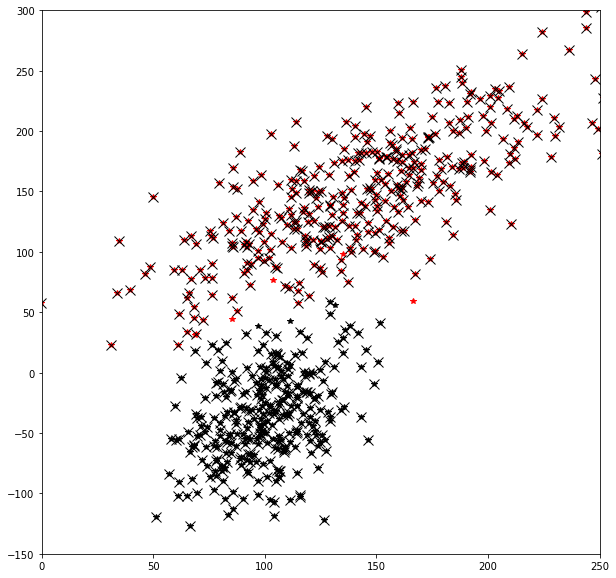

In [8]:
data_label_pred = clf.predict(data)
train_accuracy = np.mean(data_label_pred.ravel() == 1-data_label.ravel()) * 100.
print(train_accuracy)

test_label_pred = clf.predict(test)
test_accuracy = np.mean(test_label_pred == 1-test_label) * 100.
print(test_accuracy)


first=np.where(data_label_pred==0)
firstX=data[first,0]
firstY=data[first,1]

second=np.where(data_label_pred==1)
secondX=data[second,0]
secondY=data[second,1]

err=np.where(data_label_pred != data_label)
errX=data[err,0]
errY=data[err,1]

plt.figure(figsize=(10,10))
plt.plot(firstX, firstY, '*r')
plt.plot(secondX, secondY, '*k')
plt.plot(errX, errY, 'xk', markersize=10)
plt.xlim(0,250)
plt.ylim(-150,300)
plt.show()


/home/manuel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


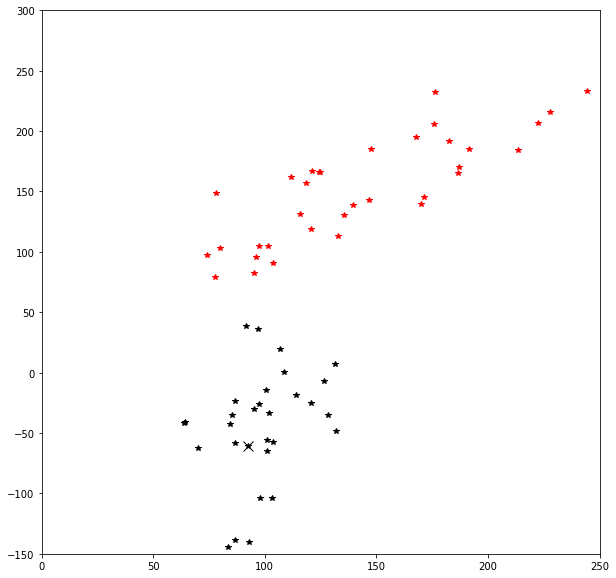

In [9]:
first=np.where(test_label_pred==0)
firstX=test[first,0]
firstY=test[first,1]

second=np.where(test_label_pred==1)
secondX=test[second,0]
secondY=test[second,1]

err=np.where(test_label_pred != test_label)
errX=test[err,0]
errY=test[err,1]

plt.figure(figsize=(10,10))
plt.plot(firstX, firstY, '*r')
plt.plot(secondX, secondY, '*k')
plt.plot(errX, errY, 'xk', markersize=10)
plt.xlim(0,250)
plt.ylim(-150,300)
plt.show()